In [1]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt



# Tarea semana 5

## Punto 2

El “coefficient of determination” o R2, 
Tiene 3 casos

Cuando es 1: Es por que el modelo ha predicho con total exactitud los valores observados

Cuando es 0: Cuando el modelo solo predice un conjunto de valores iguales a la media

Cuando es negativo: Cuando el modelo tiene una mala predicción. Probablemente signifique que el modelo ha sido incorrecto o se han aplicado restricciones que generan error


## Punto 3


(11,)
[[0.07790909]
 [0.158     ]]


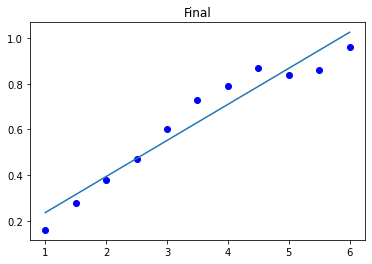

El R2 es : 0.9385079041558958


In [30]:
x1=np.array([1, 1.5, 2, 2.5, 3, 3.5 , 4, 4.5, 5, 5.5, 6])
x0=np.ones(x1.shape)
y=np.array([0.16,0.28,0.38,0.47,0.60,0.73,0.79,0.87,0.84,0.86,0.96])
print(y.shape)
X=np.matrix([x0,x1]).T
Y=np.matrix([y]).T

Theta=np.linalg.inv(X.T*X)*(X.T)*Y
print(Theta)
plt.plot(x1,y, 'bo')
plt.plot(x1,Theta[0,0]+Theta[1,0]*x1)
plt.title("Final")
plt.show()

r2 = r2_score(y, Theta[0,0]+Theta[1,0]*x1)

print("El R2 es :",r2)


## Punto 5

In [38]:
import pandas as pd
import numpy as np
#se importa el archivo cvc
df=pd.read_csv("/content/drive/MyDrive/IA/country_vaccinations.csv", sep=',',header=0)
#se selecciona la columna, vacunas diarias para colombia y se obtienen los datos
y=df.loc[df['country']=='Colombia', ['daily_vaccinations']].fillna(0).values
#se generan los array pedidos
y=np.array(y)
y=np.array(y[1:])
x1=np.arange(0,len(y),1)



(380, 1)


### Lineal

Sea la funcion hipotesis f(xi)=Θ(0)+Θ(1)*xi


In [76]:
x0=np.ones(x1.shape)
X=np.matrix([x0,x1]).T
Y=np.matrix([*y])
ThetaLin=np.linalg.inv(X.T*X)*(X.T)*Y
print('Los valores de theta son:')
print('Theta0:',ThetaLin[0,0])
print('Theta1:',ThetaLin[1,0],'\n')
yLin=ThetaLin[0,0]+ThetaLin[1,0]*x1
rLin = r2_score(y, yLin)
print("El R2 es :",rLin)

Los valores de theta son:
Theta0: 123329.01040198923
Theta1: 423.74077277106056 

El R2 es : 0.2458782593755836


### Polinomial 2 orden

Sea la funcion hipotesis f(xi)=Θ(0)+Θ(1)*xi+Θ(2)*xi^2

In [77]:
x0=np.ones(x1.shape)
X=np.matrix([x0,x1,x1*x1]).T
Y=np.matrix([*y])
ThetaP2=np.linalg.inv(X.T*X)*(X.T)*Y
print('Los valores de theta son:')
print('Theta0:',ThetaP2[0,0])
print('Theta1:',ThetaP2[1,0])
print('Theta2:',ThetaP2[2,0],'\n')

yP2=ThetaP2[0,0]+ThetaP2[1,0]*x1+ThetaP2[2,0]*x1*x1
rP2 = r2_score(y, yP2)
print("El R2 es :",rP2)

Los valores de theta son:
Theta0: 4139.424682289811
Theta1: 2315.638958797971
Theta2: -4.991815794266224 

El R2 es : 0.5743519777586243


### Polinomial 3er orden

Sea la funcion hipotesis f(xi)=Θ(0)+Θ(1)*xi+Θ(2)*xi^2+Θ(3)*xi^3

In [80]:
x0=np.ones(x1.shape)
X=np.matrix([x0,x1,x1*x1,x1*x1*x1]).T
Y=np.matrix([*y])
ThetaP3=np.linalg.inv(X.T*X)*(X.T)*Y
print('Los valores de theta son:')
print('Theta0:',ThetaP3[0,0])
print('Theta1:',ThetaP3[1,0])
print('Theta2:',ThetaP3[2,0])
print('Theta3:',ThetaP3[3,0],'\n')

yP3=ThetaP3[0,0]+ThetaP3[1,0]*x1+ThetaP3[2,0]*x1*x1+ThetaP3[3,0]*x1*x1*x1
rP3 = r2_score(y, yP3)
print("El R2 es :",rP3)

Los valores de theta son:
Theta0: -19290.860886294842
Theta1: 3062.418773950947
Theta2: -9.924299809394647
Theta3: 0.008676313131272487 

El R2 es : 0.5835630154201004


### Graficas


Text(0.5, 1.0, 'Regresion para vacunacion')

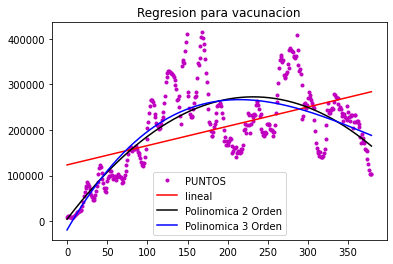

In [74]:
#fig=plt.figure( dpi=100)
#ax0,ax1,ax2=fig.subplots(3, 1)


plt.plot(x1,y, 'm.')
plt.plot(x1,yLin,'r')
plt.plot(x1,yP2,'black')
plt.plot(x1,yP3,'b')
plt.legend(['PUNTOS','lineal','Polinomica 2 Orden','Polinomica 3 Orden'])
plt.title("Regresion para vacunacion")

